# Shallow RELU Network without Bias (to predict XOR)

y.shape: (4, 1)
Epoch [100/1000], Loss: 0.1908705785
Epoch [200/1000], Loss: 0.0768663099
Epoch [300/1000], Loss: 0.0079708798
Epoch [400/1000], Loss: 0.0002039982
Epoch [500/1000], Loss: 0.0000325946
Epoch [600/1000], Loss: 0.0000193192
Epoch [700/1000], Loss: 0.0000116809
Epoch [800/1000], Loss: 0.0000070586
Epoch [900/1000], Loss: 0.0000042726
Epoch [1000/1000], Loss: 0.0000025890


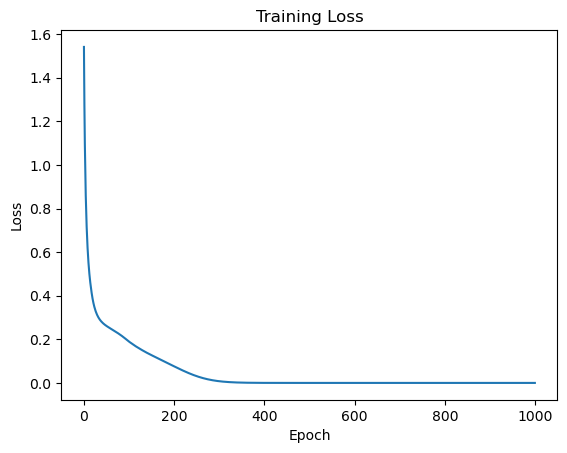

In [35]:
import numpy as np
import matplotlib.pyplot as plt


class ShallowReLUNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights randomly
        self.W1 = np.random.uniform(-1, 1, size=(input_size, hidden_size))
        self.W2 = np.random.uniform(-1, 1, size=(hidden_size, output_size))

    def relu(self, x):
        return np.maximum(0, x)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1)
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2 )
        return self.z2

    def backward(self, X, y, learning_rate):
        # Gradient of loss w.r.t. Z2
        # dLoss_dZ2 = np.dot(-2, (y - self.z2)/y) relative doesn't work atm
        dLoss_dZ2 = np.dot(-2, y - self.z2)
        
        # Gradient of loss w.r.t. W2
        dLoss_dW2 = np.dot(dLoss_dZ2.T, self.a1)
        
        # Gradient of loss w.r.t. A1
        dLoss_dA1 = np.dot(self.W2, dLoss_dZ2.T)
        
        # Gradient of loss w.r.t. Z1
        dLoss_dZ1 = (self.a1 > 0).T * dLoss_dA1
        
        # Gradient of loss w.r.t. W1
        dLoss_dW1 = np.dot(dLoss_dZ1, X)

        self.W2 -= learning_rate * dLoss_dW2.T
        self.W1 -= learning_rate * dLoss_dW1.T

    def train(self, X, y, num_epochs, learning_rate):
        loss_history = []

        for epoch in range(num_epochs):
            output = self.forward(X)
            loss = np.mean((output - y) ** 2)
            loss_history.append(loss)

            self.backward(X, y, learning_rate)

            if (epoch + 1) % 100 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.10f}")

        return loss_history


# Example usage
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]]).reshape(-1, 1)
print(f'y.shape: {y.shape}')

input_size = 2
hidden_size = 8
output_size = 1
num_epochs = 1000
learning_rate = 0.01

network = ShallowReLUNetwork(input_size, hidden_size, output_size)
loss_history = network.train(X, y, num_epochs, learning_rate)

# Plot the loss history
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

# Shallow RELU Network with Bias (to predict XOR)

Epoch [100/1000], Loss: 0.0877702542
Epoch [200/1000], Loss: 0.0091289760
Epoch [300/1000], Loss: 0.0008620030
Epoch [400/1000], Loss: 0.0001053601
Epoch [500/1000], Loss: 0.0000132629
Epoch [600/1000], Loss: 0.0000016750
Epoch [700/1000], Loss: 0.0000002118
Epoch [800/1000], Loss: 0.0000000268
Epoch [900/1000], Loss: 0.0000000034
Epoch [1000/1000], Loss: 0.0000000004


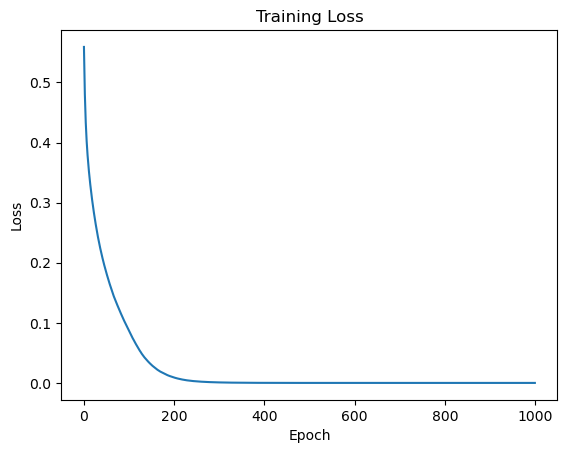

In [60]:
import numpy as np
import matplotlib.pyplot as plt


class ShallowReLUNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights and biases randomly
        self.W1 = np.random.uniform(-1, 1, size=(input_size, hidden_size))
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.uniform(-1, 1, size=(hidden_size, output_size))
        self.b2 = np.zeros((1, output_size))

    def relu(self, x):
        return np.maximum(0, x)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        return self.z2

    def backward(self, X, y, learning_rate):
            # Gradient of loss w.r.t. Z2
            dLoss_dZ2 = np.dot(-2, (y - self.z2))
            
            # Gradient of loss w.r.t. W2
            dLoss_dW2 = np.dot(dLoss_dZ2.T, self.a1)

            # Gradient of bias B2
            dLoss_db2 = np.sum(dLoss_dZ2, axis=0)
            
            # Gradient of loss w.r.t. A1
            dLoss_dA1 = np.dot(self.W2, dLoss_dZ2.T)
            
            # Gradient of loss w.r.t. Z1
            dLoss_dZ1 = (self.a1 > 0) * dLoss_dA1.T
            
            # Gradient of loss w.r.t. W1
            dLoss_dW1 = np.dot(dLoss_dZ1.T, X)

            # Gradient of bias B1
            dLoss_db1 = np.sum(dLoss_dZ1, axis=0, keepdims=True)

            self.W2 -= learning_rate * dLoss_dW2.T
            self.W1 -= learning_rate * dLoss_dW1.T
            self.b2 -= learning_rate * dLoss_db2
            self.b1 -= learning_rate * dLoss_db1


    def train(self, X, y, num_epochs, learning_rate):
        loss_history = []

        for epoch in range(num_epochs):
            output = self.forward(X)
            loss = np.mean((output - y) ** 2)
            loss_history.append(loss)

            self.backward(X, y, learning_rate)

            if (epoch + 1) % 100 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.10f}")

        return loss_history


# Example usage
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

input_size = 2
hidden_size = 8
output_size = 1
num_epochs = 1000
learning_rate = 0.01

network = ShallowReLUNetwork(input_size, hidden_size, output_size)
loss_history = network.train(X, y, num_epochs, learning_rate)

# Plot the loss history
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()